In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser as dp
from datetime import datetime 

In [2]:
tweets = pd.read_csv('tweets_data_final.csv')
tweets = tweets.dropna(axis = 1, how = 'all')
tweets.head()

,text,conversation_id,created_at,retweet_count,reply_count,like_count,quote_count,is_reply_to_user,related_user_id
0,If your long term conviction of bitcoin’s valu...,1525612785375264768,2022-05-14T23:03:27.000Z,378,196,2546,42,0,339061487
1,"We have helped nearly 1,000 people get a new j...",1525490438093799424,2022-05-14T14:57:17.000Z,50,87,331,4,0,339061487
2,Bitcoin is the best first principles solution ...,1525234174046658565,2022-05-13T21:58:59.000Z,209,231,1380,24,0,339061487
3,I have officially been writing a letter on tec...,1525106011849347078,2022-05-13T13:29:42.000Z,34,101,373,3,0,339061487
4,"[NEW POST] Some Thoughts On LUNA / UST\n\n""The...",1524944753753735178,2022-05-13T02:48:56.000Z,96,192,636,14,0,339061487


In [3]:
# tranform time to timestamp
time_in_timestamp = np.zeros(tweets.shape[0])
for i in range(len(time_in_timestamp)):
    past = datetime.strptime(tweets['created_at'][i], "%Y-%m-%dT%H:%M:%S.000Z")
    past = datetime.timestamp(past)
    time_in_timestamp[i] = past
tweets['timestamp'] = time_in_timestamp
tweets['cluster'] = np.nan

In [4]:
tweets['related_user_id'].nunique()

100

# distribution of tweets

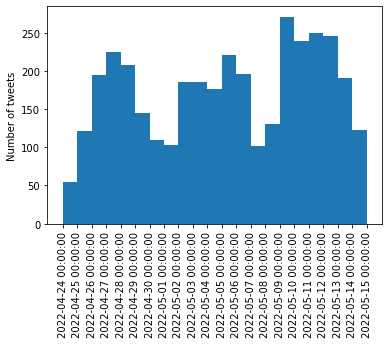

In [5]:
l = tweets['created_at'].min()[:10]
left = dp.parse(l).timestamp()
r = tweets['created_at'].max()[:10]
right = dp.parse(r).timestamp()+24*60*60
day_bin = np.arange(left, right, 24*60*60)
date = pd.date_range(start = l, end = r, freq='D')
plt.hist(tweets['timestamp'], bins = day_bin)
plt.xticks(day_bin, date, rotation ='vertical')
plt.ylabel('Number of tweets')
plt.show()

# Find cluster

In [6]:
# # Find cluster
# num_id = tweets['related_user_id'].nunique()
# threshold = 0.15
# delta_time = 2  # length of each bin

# min_time = tweets['timestamp'].min()
# max_time = tweets['timestamp'].max()

# bin_start = np.arange(min_time, max_time, delta_time*3600)
# cluster_tweets = pd.DataFrame(columns = tweets.columns)

# cluster_count = -1
# flag = False
# cluster_timestamp = []

# for t in bin_start:
#     df = tweets[tweets['timestamp'].between(t, t+delta_time*3600)]
#     id_count = df['related_user_id'].nunique()
#     if id_count >= threshold*num_id: # a cluster found
#         if flag == False:
#             cluster_count += 1
#             cluster_timestamp.append(t)
#         df['cluster'] = cluster_count
#         cluster_tweets = cluster_tweets.append(df, ignore_index = True)
#         flag = True 
        
#     else:
#         flag = False

In [7]:
# delta_hour = []
# for i in range(cluster_count):
#     tmin = cluster_tweets[cluster_tweets['cluster'] == i]['timestamp'].min()
#     tmax = cluster_tweets[cluster_tweets['cluster'] == i]['timestamp'].max()
#     delta = tmax-tmin
#     delta_hour.append(delta/3600)
# max(delta_hour)

# Another way of finding cluster

In [8]:
# Find cluster
num_id = tweets['related_user_id'].nunique()
delta_time = 0.5  # length of each bin
shift_time = 2    # time shift forward to predict price

min_time = tweets['timestamp'].min()
max_time = tweets['timestamp'].max()

bin_start = np.arange(min_time, max_time, delta_time*3600)
cluster_tweets = pd.DataFrame(columns = tweets.columns)
cluster_count = 0

for t in bin_start:
    df = tweets[tweets['timestamp'].between(t, t+delta_time*3600)]
    df['cluster'] = cluster_count
    cluster_tweets = cluster_tweets.append(df, ignore_index = True)
    cluster_count += 1


<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_count
<ipython-input-8-135378b0d6f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [9]:
cluster_tweets

,text,conversation_id,created_at,retweet_count,reply_count,like_count,quote_count,is_reply_to_user,related_user_id,timestamp,cluster
0,The CEO of the Nasdaq-listed company Microstra...,1518032771675000834,2022-04-24T01:03:11.000Z,104,176,321,15,0,3367334171,1.650755e+09,0
1,less #bitcoin friendly fire 🙏 enough drama in ...,1518036689125531648,2022-04-24T01:18:45.000Z,194,158,1566,17,0,213236426,1.650756e+09,0
2,RT @SilvermanJacob: Computer scientist David R...,1518029556489551872,2022-04-24T00:50:24.000Z,170,0,0,0,0,1051852534518824960,1.650754e+09,0
3,RT @0xfoobar: Email is the bitcoin of social m...,1518041505965002753,2022-04-24T01:37:53.000Z,38,0,0,0,0,2631709828,1.650757e+09,1
4,Microstrategy Chairman and CEO Michael Saylor ...,1518065189878255616,2022-04-24T03:12:00.000Z,45,99,176,3,0,928759224599040001,1.650763e+09,4
...,...,...,...,...,...,...,...,...,...,...,...
3675,#Bitcoin inhibits the absolution of power and ...,1525624370172858368,2022-05-14T23:49:29.000Z,27,19,237,0,0,285636352,1.652565e+09,1005
3676,What is something #Bitcoin doesn’t fix?,1525627578412806147,2022-05-15T00:02:14.000Z,21,365,278,7,0,1150790822813560833,1.652566e+09,1006
3677,"🚨 🚨 🚨 1,267 #BTC (37,861,845 USD) transferred...",1525628993017466886,2022-05-15T00:07:51.000Z,23,37,373,7,0,1039833297751302144,1.652566e+09,1006
3678,RT @StoneyFarmsOG: @APompliano @elonmusk Bitco...,1525631988941869056,2022-05-15T00:19:45.000Z,20,0,0,0,0,1051852534518824960,1.652567e+09,1006


In [10]:
def timestamp_to_time(timestamp_list):
    time_list = []
    for i in range(len(timestamp_list)):
        time_list.append(datetime.fromtimestamp(timestamp_list[i]).strftime(format='%Y-%m-%d %H:%M:00'))
    return time_list

In [11]:
def get_bitcoin_price(df, timestamp_list, price_path):
    # timestamp_list: bitcoin price time for each cluster(in timestamp)
    time_list = timestamp_to_time(timestamp_list)
    bitcoin = pd.read_csv(price_path)
    count = 0
    for t in time_list:
        p = bitcoin[bitcoin['time'] == t]['close'].values[0]
        v = bitcoin[bitcoin['time'] == t]['volume'].values[0]
        df.loc[df['cluster'] == count, 'price'] = p
        df.loc[df['cluster'] == count, 'trading_volume'] = v
        count += 1
    return df

In [12]:
df = get_bitcoin_price(cluster_tweets, bin_start+3600*(shift_time+delta_time), 'bitcoin_minutely_data_final.csv')
df

,text,conversation_id,created_at,retweet_count,reply_count,like_count,quote_count,is_reply_to_user,related_user_id,timestamp,cluster,price,trading_volume
0,The CEO of the Nasdaq-listed company Microstra...,1518032771675000834,2022-04-24T01:03:11.000Z,104,176,321,15,0,3367334171,1.650755e+09,0,39734.376585,0.018191
1,less #bitcoin friendly fire 🙏 enough drama in ...,1518036689125531648,2022-04-24T01:18:45.000Z,194,158,1566,17,0,213236426,1.650756e+09,0,39734.376585,0.018191
2,RT @SilvermanJacob: Computer scientist David R...,1518029556489551872,2022-04-24T00:50:24.000Z,170,0,0,0,0,1051852534518824960,1.650754e+09,0,39734.376585,0.018191
3,RT @0xfoobar: Email is the bitcoin of social m...,1518041505965002753,2022-04-24T01:37:53.000Z,38,0,0,0,0,2631709828,1.650757e+09,1,39830.672777,0.180585
4,Microstrategy Chairman and CEO Michael Saylor ...,1518065189878255616,2022-04-24T03:12:00.000Z,45,99,176,3,0,928759224599040001,1.650763e+09,4,39692.000000,0.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,#Bitcoin inhibits the absolution of power and ...,1525624370172858368,2022-05-14T23:49:29.000Z,27,19,237,0,0,285636352,1.652565e+09,1005,29958.000000,0.010212
3676,What is something #Bitcoin doesn’t fix?,1525627578412806147,2022-05-15T00:02:14.000Z,21,365,278,7,0,1150790822813560833,1.652566e+09,1006,29878.000000,0.022074
3677,"🚨 🚨 🚨 1,267 #BTC (37,861,845 USD) transferred...",1525628993017466886,2022-05-15T00:07:51.000Z,23,37,373,7,0,1039833297751302144,1.652566e+09,1006,29878.000000,0.022074
3678,RT @StoneyFarmsOG: @APompliano @elonmusk Bitco...,1525631988941869056,2022-05-15T00:19:45.000Z,20,0,0,0,0,1051852534518824960,1.652567e+09,1006,29878.000000,0.022074


In [13]:
# combine replies with original tweets
replies = pd.read_csv('replies_data_final.csv')
for i in range(cluster_tweets.shape[0]):
    df = replies[replies['conversation_id'] == cluster_tweets.iloc[i]['conversation_id']]
    df = df[df['related_user_id'] == cluster_tweets.iloc[i]['related_user_id']]
    cluster_tweets = cluster_tweets.append(df)


In [15]:
tweets['created_at'].min()

'2022-04-24T00:50:24.000Z'